In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/DoctorDatasetcsvfile.csv'  # Replace with your file path
raw_data = pd.read_csv(file_path, sep=';')

# Preview the data
print("Dataset Preview:")
print(raw_data.head())

# Dataset Information
print("Dataset Info:")
print(raw_data.info())
output_file_path = 'formatted_Doctor_data.csv'
raw_data.to_csv(output_file_path, index=False)
print(f"Formatted data saved to {output_file_path}")



Dataset Preview:
     Doctor name ,specialization,Hospital ,district 
0  Dr. Kumuduni Amarasinghe Muthaliff,Addiction P...
1  Dr. Chathurika Weerasooriya,Anxiety reduction ...
2  Dr. Nimal Liyanage,Applied Psychologist ,Medih...
3  Dr. Nimal Liyanage,Applied Psychologist ,Winse...
4  Dr. Lasantha Wijesekara,Applied Psychologist ,...
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 1 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Doctor name ,specialization,Hospital ,district   296 non-null    object
dtypes: object(1)
memory usage: 2.4+ KB
None
Formatted data saved to formatted_Doctor_data.csv


In [2]:
# Remove unnecessary characters
raw_data = raw_data.replace('"', '', regex=True)

# Check for missing values
missing_values = raw_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop rows with missing values (if any exist)
raw_data = raw_data.dropna()

print("Cleaned Dataset Preview:")
print(raw_data.head())


Missing Values:
 Doctor name ,specialization,Hospital ,district     0
dtype: int64
Cleaned Dataset Preview:
     Doctor name ,specialization,Hospital ,district 
0  Dr. Kumuduni Amarasinghe Muthaliff,Addiction P...
1  Dr. Chathurika Weerasooriya,Anxiety reduction ...
2  Dr. Nimal Liyanage,Applied Psychologist ,Medih...
3  Dr. Nimal Liyanage,Applied Psychologist ,Winse...
4  Dr. Lasantha Wijesekara,Applied Psychologist ,...


In [3]:
print(raw_data.columns)


Index(['Doctor name ,specialization,Hospital ,district '], dtype='object')


In [4]:
raw_data.columns = raw_data.columns.str.strip()


In [5]:
print(raw_data.columns)


Index(['Doctor name ,specialization,Hospital ,district'], dtype='object')


In [6]:
# Strip leading/trailing spaces from column names
raw_data.columns = raw_data.columns.str.strip()

# Now, access the column with the correct name
raw_data[['Doctor Name', 'Specialization', 'Hospital', 'District']] = raw_data[
    'Doctor name ,specialization,Hospital ,district'
].str.split(',', expand=True)

# Drop the original combined column
raw_data = raw_data.drop(columns=['Doctor name ,specialization,Hospital ,district'])

# Preview the cleaned data
print("Cleaned and Split Dataset Preview:")
print(raw_data.head())

Cleaned and Split Dataset Preview:
                          Doctor Name             Specialization  \
0  Dr. Kumuduni Amarasinghe Muthaliff     Addiction Professional   
1         Dr. Chathurika Weerasooriya  Anxiety reduction therapy   
2                  Dr. Nimal Liyanage      Applied Psychologist    
3                  Dr. Nimal Liyanage      Applied Psychologist    
4             Dr. Lasantha Wijesekara      Applied Psychologist    

                     Hospital       District  
0   Nawinna Medicare Hospital     Maharagama  
1  Blue cross medical Centre      Rajagiriya  
2           Medihelp Hospital  Mount Lavinia  
3           Winsetha Hospital     Colombo 10  
4           Winsetha Hospital     Colombo 10  


In [7]:
raw_data = raw_data.drop_duplicates()
print("Dataset after removing duplicates:")
print(raw_data.head())


Dataset after removing duplicates:
                          Doctor Name             Specialization  \
0  Dr. Kumuduni Amarasinghe Muthaliff     Addiction Professional   
1         Dr. Chathurika Weerasooriya  Anxiety reduction therapy   
2                  Dr. Nimal Liyanage      Applied Psychologist    
3                  Dr. Nimal Liyanage      Applied Psychologist    
4             Dr. Lasantha Wijesekara      Applied Psychologist    

                     Hospital       District  
0   Nawinna Medicare Hospital     Maharagama  
1  Blue cross medical Centre      Rajagiriya  
2           Medihelp Hospital  Mount Lavinia  
3           Winsetha Hospital     Colombo 10  
4           Winsetha Hospital     Colombo 10  


In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
raw_data['Specialization'] = label_encoder.fit_transform(raw_data['Specialization'])
raw_data['Hospital'] = label_encoder.fit_transform(raw_data['Hospital'])
raw_data['District'] = label_encoder.fit_transform(raw_data['District'])

# Preview the dataset after encoding
print("Encoded Dataset Preview:")
print(raw_data.head())


Encoded Dataset Preview:
                          Doctor Name  Specialization  Hospital  District
0  Dr. Kumuduni Amarasinghe Muthaliff               0        71        41
1         Dr. Chathurika Weerasooriya               1        25        54
2                  Dr. Nimal Liyanage               2        57        46
3                  Dr. Nimal Liyanage               2        98        17
4             Dr. Lasantha Wijesekara               2        98        17


In [9]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for PCA (excluding 'Doctor Name')
features = raw_data.drop(columns=['Doctor Name'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Convert back to a DataFrame for easier interpretation
scaled_df = pd.DataFrame(scaled_data, columns=features.columns)
print("Standardized Data Preview:")
print(scaled_df.head())


Standardized Data Preview:
   Specialization  Hospital  District
0       -2.737177  0.887542  0.616319
1       -2.601054 -0.703816  1.396193
2       -2.464931  0.403216  0.916271
3       -2.464931  1.821601 -0.823448
4       -2.464931  1.821601 -0.823448


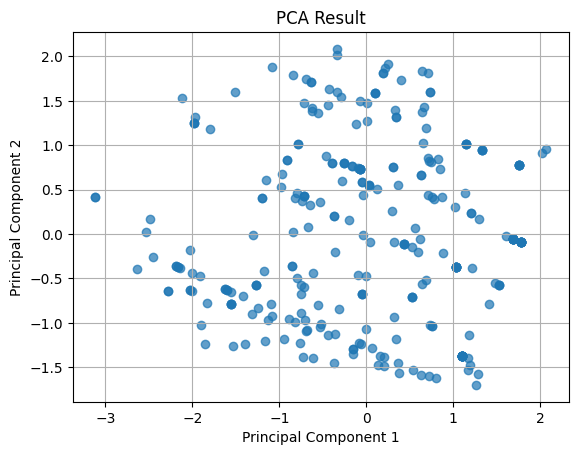

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming scaled_df is your standardized data
pca = PCA(n_components=2)  # Reduce to 2 principal components
principalComponents = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data = principalComponents,
columns = ['Principal Component 1', 'Principal Component 2'])


plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.7)
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [11]:
print(pca.components_)


[[ 0.65361084 -0.64747429  0.39187997]
 [-0.25653835  0.29759911  0.91957754]]


In [12]:
print("Original features:", list(features.columns))
print("Number of original features:", len(features.columns))


Original features: ['Specialization', 'Hospital', 'District']
Number of original features: 3


In [13]:
print("Number of principal components:", pca.n_components_)


Number of principal components: 2


In [14]:
import pandas as pd

# Get the PCA loadings
loadings = pd.DataFrame(pca.components_, columns=features.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])

print("PCA Loadings:")
print(loadings)


PCA Loadings:
     Specialization  Hospital  District
PC1        0.653611 -0.647474  0.391880
PC2       -0.256538  0.297599  0.919578


In [27]:
# Add a 'Is_Relevant' column with updated logic
relevant_specializations = ['Applied Psychologist', 'Addiction Professional']  # Adjust as needed
raw_data['Is_Relevant'] = raw_data['Specialization'].apply(lambda x: 1 if x in relevant_specializations else 0) # Changed df to raw_data

# Verify the unique values in the target column
print("Unique classes in Is_Relevant:", raw_data['Is_Relevant'].unique()) # Changed df to raw_data
print("Class distribution:\n", raw_data['Is_Relevant'].value_counts()) # Changed df to raw_data

Unique classes in Is_Relevant: [0 1]
Class distribution:
 Is_Relevant
0    296
1      1
Name: count, dtype: int64


In [35]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd

# Step 1: Ensure 'Is_Relevant' has both 0 and 1 values
if raw_data['Is_Relevant'].value_counts().get(1, 0) == 0:
    print("Warning: No relevant doctors found. Adjusting logic or adding dummy data.")
    # Add a dummy minority sample
    dummy_data = pd.DataFrame([{'Specialization': 'Applied Psychologist', 'District': 'Colombo', 'Is_Relevant': 1}])
    raw_data = pd.concat([raw_data, dummy_data], ignore_index=True)

# Manually duplicate minority class sample if it has only 1 instance
if raw_data['Is_Relevant'].value_counts().get(1, 0) == 1:
    print("Only one minority sample found. Duplicating it to ensure compatibility with SMOTE.")
    minority_sample = raw_data[raw_data['Is_Relevant'] == 1]
    raw_data = pd.concat([raw_data, minority_sample], ignore_index=True)

# Step 2: Fill missing values and ensure all values are strings
raw_data['Specialization'] = raw_data['Specialization'].fillna('Unknown').astype(str)
raw_data['District'] = raw_data['District'].fillna('Unknown').astype(str)

# Step 3: Encode categorical features
label_encoder = LabelEncoder()
raw_data['Specialization_Encoded'] = label_encoder.fit_transform(raw_data['Specialization'])
raw_data['District_Encoded'] = label_encoder.fit_transform(raw_data['District'])

# Step 4: Define features and target
X = raw_data[['Specialization_Encoded', 'District_Encoded']]
y = raw_data['Is_Relevant']

# Step 5: Apply SMOTE
smote = SMOTE(random_state=42, k_neighbors=1)  # Use k_neighbors=1 to avoid errors
X_balanced, y_balanced = smote.fit_resample(X, y)

print("Balanced class distribution:\n", pd.Series(y_balanced).value_counts())


Only one minority sample found. Duplicating it to ensure compatibility with SMOTE.
Balanced class distribution:
 Is_Relevant
0    296
1    296
Name: count, dtype: int64


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

# Step 2: Train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = model.predict(X_test)


In [37]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        59

    accuracy                           1.00       119
   macro avg       1.00      1.00      1.00       119
weighted avg       1.00      1.00      1.00       119



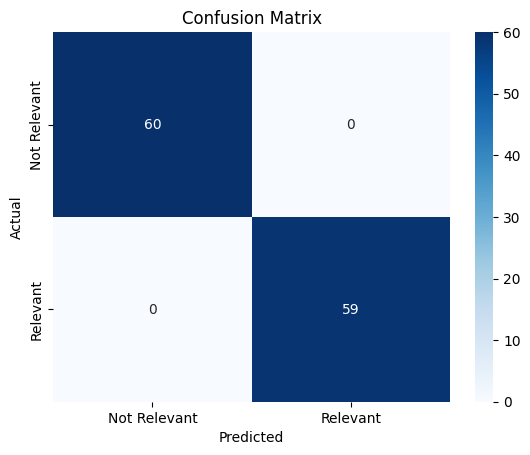

In [38]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Relevant', 'Relevant'], yticklabels=['Not Relevant', 'Relevant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [39]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Perform grid search
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'C': 10, 'solver': 'lbfgs'}
Best Accuracy: 1.0


In [40]:
import joblib

# Save the model
joblib.dump(model, 'logistic_regression_model.pkl')

# Load the model (example)
loaded_model = joblib.load('logistic_regression_model.pkl')


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Step 1: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

# Step 2: Standardize the features (important for KNN to avoid bias due to scale differences)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Step 3: Train the KNN model (initially set n_neighbors=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
# Step 4: Make predictions
y_pred = knn.predict(X_test_scaled)
# Step 5: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        59

    accuracy                           1.00       119
   macro avg       1.00      1.00      1.00       119
weighted avg       1.00      1.00      1.00       119



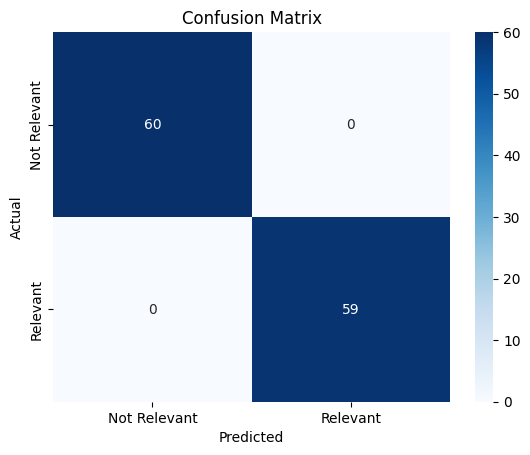

In [42]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Relevant', 'Relevant'], yticklabels=['Not Relevant', 'Relevant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


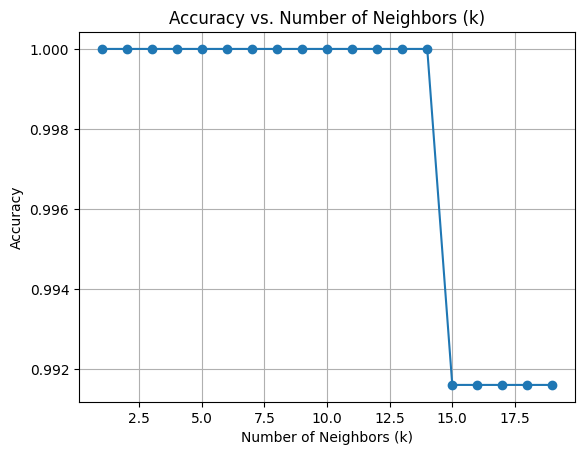

In [43]:
# Test different values for k
k_values = range(1, 20)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs. k
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


In [44]:
# Retrain with the best k (replace 5 with the optimal k)
best_k = 5  # Example: update based on the plot
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Evaluate again
print("Final Accuracy with k =", best_k, ":", accuracy_score(y_test, y_pred))


Final Accuracy with k = 5 : 1.0


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Step 1: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)
# Step 2: Train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
# Step 3: Make predictions
y_pred = decision_tree.predict(X_test)
# Step 4: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        59

    accuracy                           1.00       119
   macro avg       1.00      1.00      1.00       119
weighted avg       1.00      1.00      1.00       119



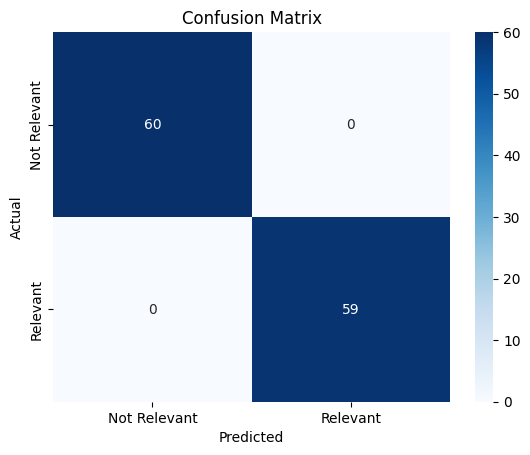

In [46]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Relevant', 'Relevant'], yticklabels=['Not Relevant', 'Relevant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [47]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Retrain the model with the best parameters
best_decision_tree = grid_search.best_estimator_
best_decision_tree.fit(X_train, y_train)


Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 1.0


DecisionTreeClassifier(max_depth=3, random_state=42)

Final Accuracy (Optimized Model): 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        59

    accuracy                           1.00       119
   macro avg       1.00      1.00      1.00       119
weighted avg       1.00      1.00      1.00       119



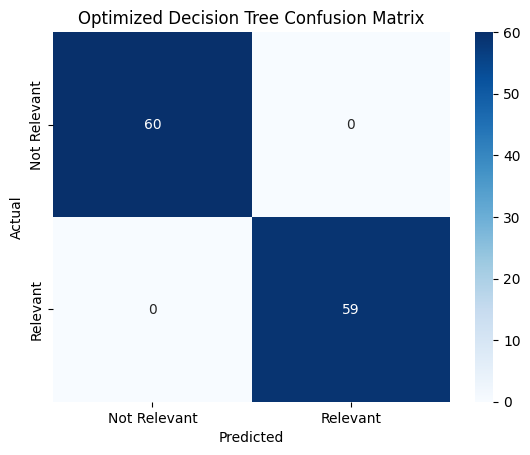

In [48]:
# Make predictions with the optimized model
y_pred_optimized = best_decision_tree.predict(X_test)

# Evaluate the optimized model
print("Final Accuracy (Optimized Model):", accuracy_score(y_test, y_pred_optimized))
print("\nClassification Report:\n", classification_report(y_test, y_pred_optimized))

# Confusion matrix for optimized model
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)
sns.heatmap(conf_matrix_optimized, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Relevant', 'Relevant'], yticklabels=['Not Relevant', 'Relevant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Optimized Decision Tree Confusion Matrix')
plt.show()
